In [2]:
import	pandas	as	pd
import	numpy	as	np
import	seaborn	as	sns
import	matplotlib.pyplot	as	plt

In [7]:
import opendatasets as od
import pandas as pd
import os

In [5]:
pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Rasina rassi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:03<00:00, 185MB/s] 


In [4]:
import pandas as pd
import os

In [9]:
import os
os.listdir('/content/us-accidents')

['US_Accidents_March23.csv']

In [6]:
import pandas as pd
data = pd.read_csv('/content/us-accidents/US_Accidents_March23.csv', nrows=100000)


In [7]:
data.to_csv('/content/reduced_us_accidents.csv', index=False)

In [8]:
#DATA cleaning
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
#filling null values

In [10]:
data["Visibility(mi)"].fillna(data["Visibility(mi)"].mean(),inplace=True)
data["Temperature(F)"].fillna(data["Temperature(F)"].mean(),inplace=True)
data["Pressure(in)"].fillna(data["Pressure(in)"].mean(),inplace=True)



In [15]:
#changing datatype of the column End_Time to extract day,month,year and other details

data['End_Time'] = pd.to_datetime(data['End_Time'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
data["Year"]=data["End_Time"].dt.year
data['Month']=data['End_Time'].dt.month
data['Day']= data['End_Time'].dt.day
data['Hour']=data['End_Time'].dt.hour
data['Minute']=data['End_Time'].dt.minute
data['Second']=data['End_Time'].dt.second
data["Date"]=data["End_Time"].dt.date
data["Time"]=data["End_Time"].dt.time

In [16]:
# Combining Weather_Condition and Visibility columns...
data["w_v_combined"] =data["Visibility(mi)"].astype(str)+" "+data["Weather_Condition"]
data["w_v_combined"]

,w_v_combined
0,10.0 Light Rain
1,10.0 Light Rain
2,10.0 Overcast
3,9.0 Mostly Cloudy
4,6.0 Mostly Cloudy
...,...
99995,10.0 Mostly Cloudy
99996,10.0 Clear
99997,10.0 Mostly Cloudy
99998,10.0 Mostly Cloudy


In [17]:
data.shape

(100000, 55)

In [18]:
# checking for null values
data.isnull().sum().sort_values(ascending=False)


,0
End_Lat,100000
End_Lng,100000
Wind_Chill(F),95678
Precipitation(in),92632
Wind_Speed(mph),23820
Humidity(%),1856
Weather_Condition,1604
w_v_combined,1604
Wind_Direction,1064
Weather_Timestamp,1054


In [19]:
# Checking for the data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     100000 non-null  object        
 1   Source                 100000 non-null  object        
 2   Severity               100000 non-null  int64         
 3   Start_Time             100000 non-null  object        
 4   End_Time               100000 non-null  datetime64[ns]
 5   Start_Lat              100000 non-null  float64       
 6   Start_Lng              100000 non-null  float64       
 7   End_Lat                0 non-null       float64       
 8   End_Lng                0 non-null       float64       
 9   Distance(mi)           100000 non-null  float64       
 10  Description            100000 non-null  object        
 11  Street                 100000 non-null  object        
 12  City                   99999 non-null   objec

In [20]:
# Checking for duplicates
duplicates=data[data.duplicated(keep="first")]
print(duplicates)


Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight, Year, Month, Day, Hour, Minute, Second, Date, Time, w_v_combined]
Index: []

[0 rows x 55 columns]


In [21]:
#UNIVARIATE ANALYSIS

# Summary statistics of the data
data.describe()


,Severity,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Day,Hour,Minute,Second
count,100000.000000,100000,100000.000000,100000.000000,0.0,0.0,100000.000000,100000.000000,4322.000000,98144.000000,100000.000000,100000.000000,76180.000000,7368.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.448120,2016-09-13 05:48:42.602379776,35.630369,-119.322756,NaN,NaN,0.011345,66.641262,48.845812,59.794170,29.961021,9.338639,8.044165,0.025786,2016.093400,7.784060,15.950940,13.921520,29.032710,25.471780
min,1.000000,2016-02-08 06:37:59,32.542587,-123.813927,NaN,NaN,0.000000,3.200000,-8.400000,4.000000,2.980000,0.100000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2016-07-19 11:32:45,33.957775,-121.828468,NaN,NaN,0.000000,57.900000,37.100000,43.000000,29.890000,10.000000,4.600000,0.000000,2016.000000,6.000000,8.000000,10.000000,15.000000,7.000000
50%,2.000000,2016-09-18 18:58:13.500000,34.168579,-118.384232,NaN,NaN,0.000000,66.200000,42.500000,62.000000,29.970000,10.000000,6.900000,0.000000,2016.000000,8.000000,16.000000,14.000000,28.000000,25.000000
75%,3.000000,2016-11-20 01:47:11.750000128,37.776682,-117.916023,NaN,NaN,0.010000,75.000000,63.000000,78.000000,30.060000,10.000000,10.400000,0.030000,2016.000000,10.000000,23.000000,19.000000,44.000000,42.000000
max,4.000000,2017-01-26 20:52:00,41.428753,-81.550728,NaN,NaN,51.130000,114.100000,107.000000,100.000000,33.040000,80.000000,241.700000,0.550000,2017.000000,12.000000,31.000000,23.000000,59.000000,59.000000
std,0.499931,NaN,2.101259,3.663525,NaN,NaN,0.262244,12.602381,19.898270,23.184442,0.273886,1.868341,4.298926,0.051695,0.290994,3.269244,8.766763,5.918366,17.106712,19.044511


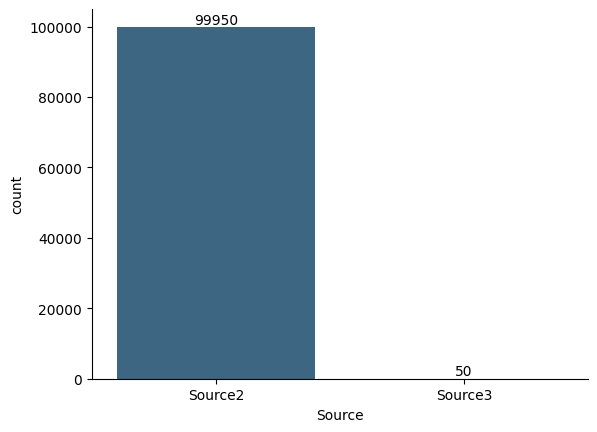

In [24]:
# Row accident data from different sources
import seaborn as sns
import matplotlib.pyplot as plt

row_data_sources=data.Source.value_counts()
sns.barplot(x=row_data_sources.index,y=row_data_sources,palette="viridis", hue=row_data_sources.index, legend=False)
sns.despine(right=True)
for i,v in enumerate(row_data_sources):
 plt.text(i,v+1,str(v),ha="center",va="bottom")

In [25]:
data.head(10)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Astronomical_Twilight,Year,Month,Day,Hour,Minute,Second,Date,Time,w_v_combined
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,2016,2,8,11,0,0,2016-02-08,11:00:00,10.0 Light Rain
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Day,2016,2,8,6,37,59,2016-02-08,06:37:59,10.0 Light Rain
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Day,2016,2,8,7,19,27,2016-02-08,07:19:27,10.0 Overcast
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,2016,2,8,7,53,34,2016-02-08,07:53:34,9.0 Mostly Cloudy
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,2016,2,8,8,9,7,2016-02-08,08:09:07,6.0 Mostly Cloudy
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,Day,2016,2,8,8,14,26,2016-02-08,08:14:26,7.0 Light Rain
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,Day,2016,2,8,8,29,35,2016-02-08,08:29:35,7.0 Overcast
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,Day,2016,2,8,8,29,58,2016-02-08,08:29:58,7.0 Overcast
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,Day,2016,2,8,8,30,40,2016-02-08,08:30:40,5.0 Mostly Cloudy
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,Day,2016,2,8,8,40,4,2016-02-08,08:40:04,3.0 Light Rain


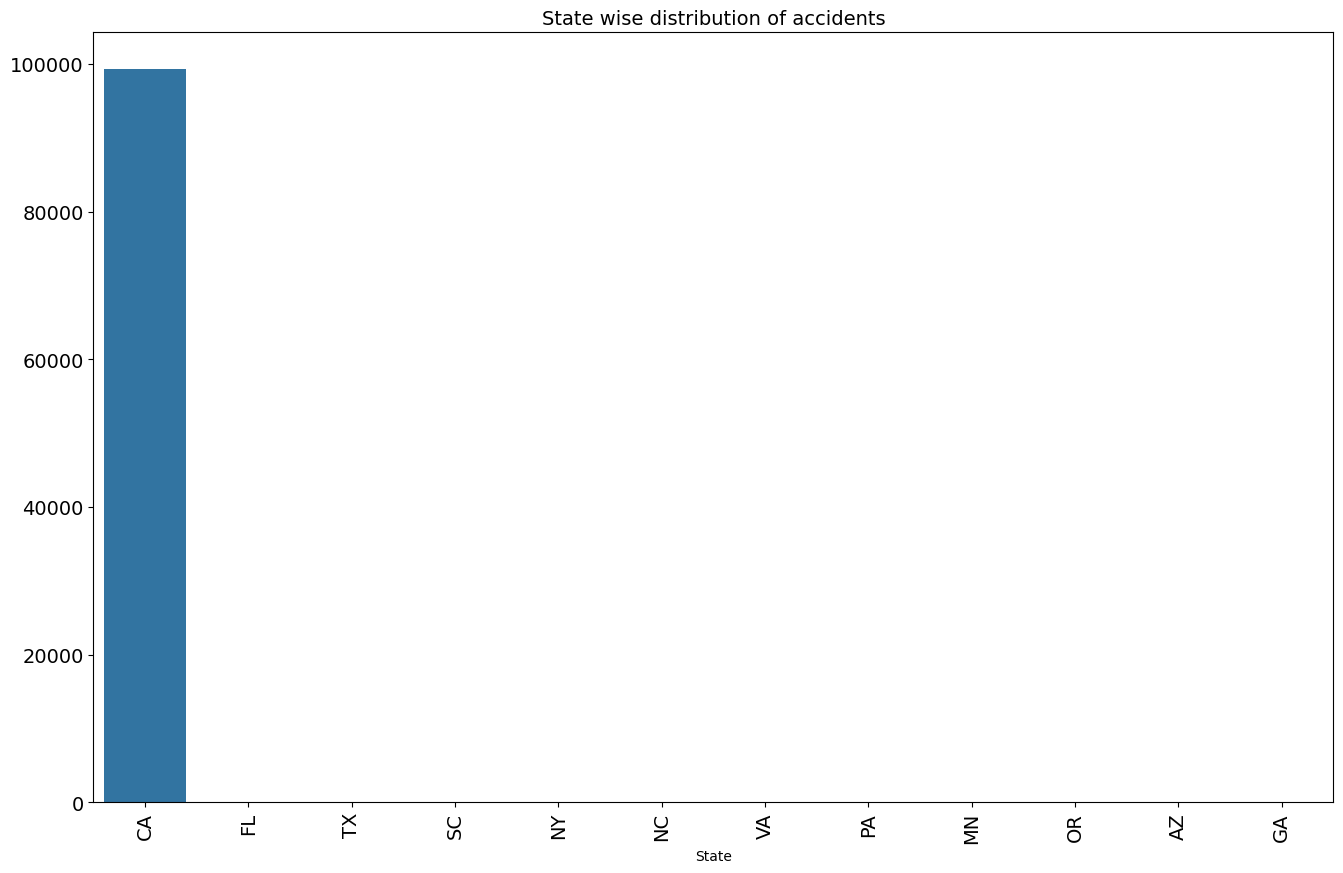

In [27]:
# State wise distribution of accidents
plt.figure(figsize=(16,10))
sns.countplot(data=data,x=data.State,order=['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR', 'AZ', 'GA'])
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.ylabel(None)
plt.title("State wise distribution of accidents",fontsize=14)
plt.show()

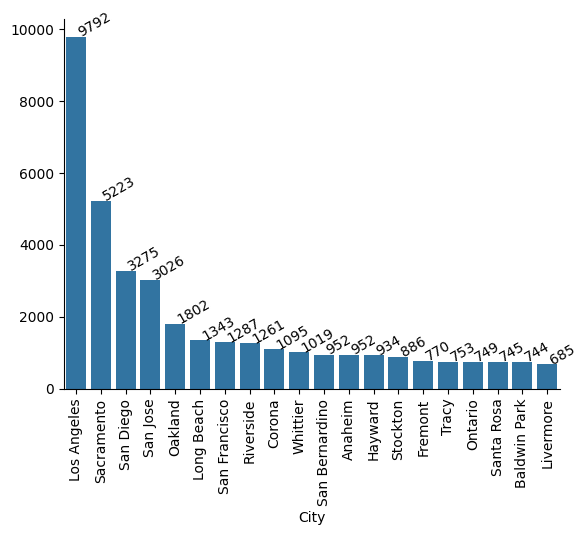

In [28]:
# Top 20 hotspots cities of accidents in california(CA)
CA_data=data[data["State"]=="CA"]
CA_City=CA_data.groupby("City")["City"].count().sort_values(ascending=False).head(20)
sns.barplot(x=CA_City.index,y=CA_City)
sns.despine(right=True)
for i,v in enumerate(CA_City):
  plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.show()


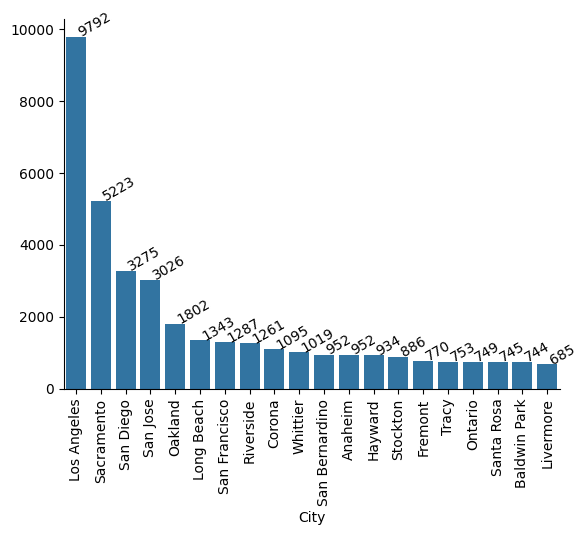

In [29]:
# Top cities with highest number of accidents
city_data=data.groupby("City")["City"].count().sort_values(ascending=False).head(20)
sns.barplot(x=city_data.index,y=city_data)
sns.despine(right=True)
for i,v in enumerate(city_data):
  plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.show()

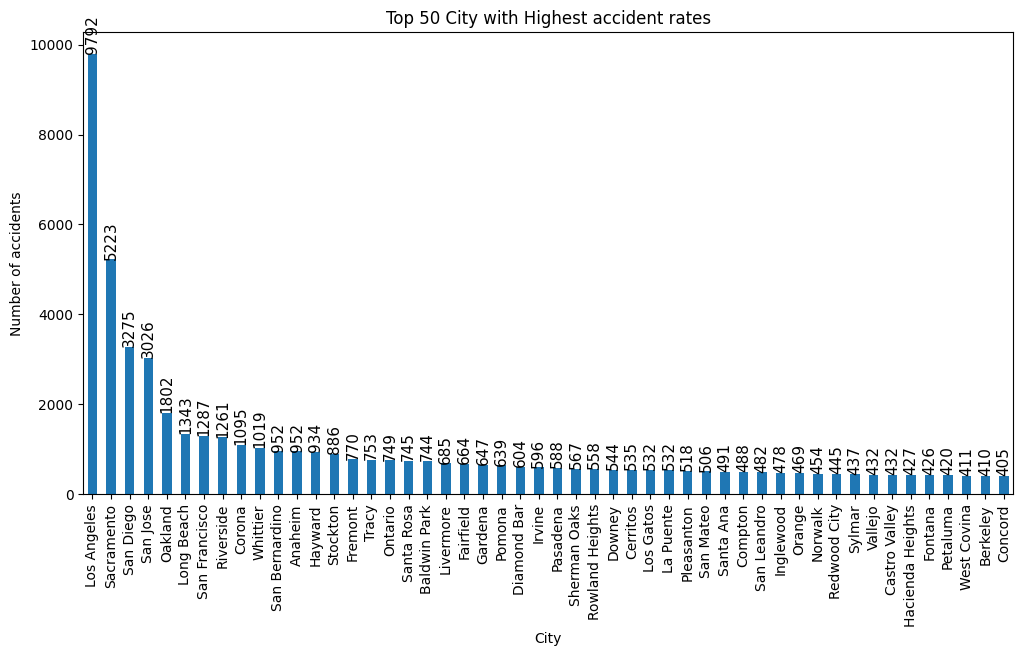

In [30]:
# Top 50 cities with Highest accident rates
plt.figure(figsize=(12,6))
city_wise_groupd=data.groupby("City")["City"].count().sort_values(ascending=False).head(50)
city_wise_groupd.plot(kind="bar")
for i,v in enumerate(city_wise_groupd):
  plt.text(i,v+1,str(v),ha="center",va="bottom",rotation=90,size=11)
plt.ylabel("Number of accidents")
plt.xlabel("City")
plt.title("Top 50 City with Highest accident rates")
plt.xticks(rotation=90)
plt.show()


<ipython-input-31-4285402676>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data.index,y=year_data,palette="rocket")


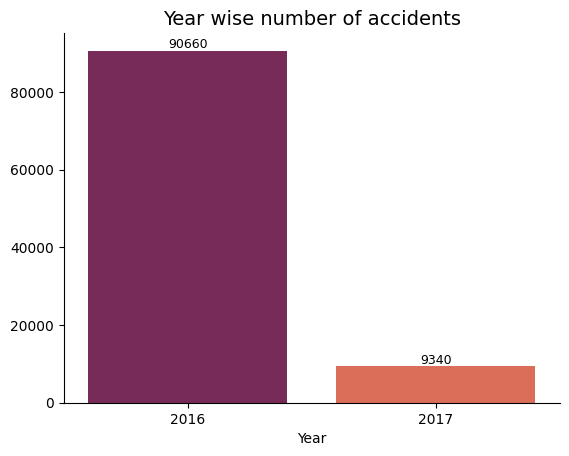

In [31]:
# Year wise number of accidents...
year_data=data.groupby("Year")["ID"].count()
sns.barplot(x=year_data.index,y=year_data,palette="rocket")
sns.despine(right=True)
for i,v in enumerate(year_data):
  plt.text(i,v+1,str(v),ha="center",va="bottom",size=9)
plt.ylabel(None)
plt.title("Year wise number of accidents",size=14)
plt.show()

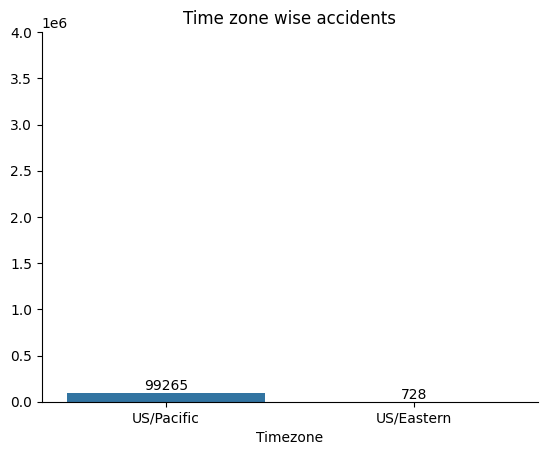

In [32]:
# Time zone wise accidents
nm=data.groupby("Timezone")["Timezone"].count().sort_values(ascending=False)
sns.barplot(x=nm.index,y=nm)
sns.despine(right=True)
plt.ylabel(None)
plt.title("Time zone wise accidents")
plt.ylim([0,4000000])

for i,v in enumerate(nm):
  plt.text(i,v+1,str(v),ha="center",va="bottom")

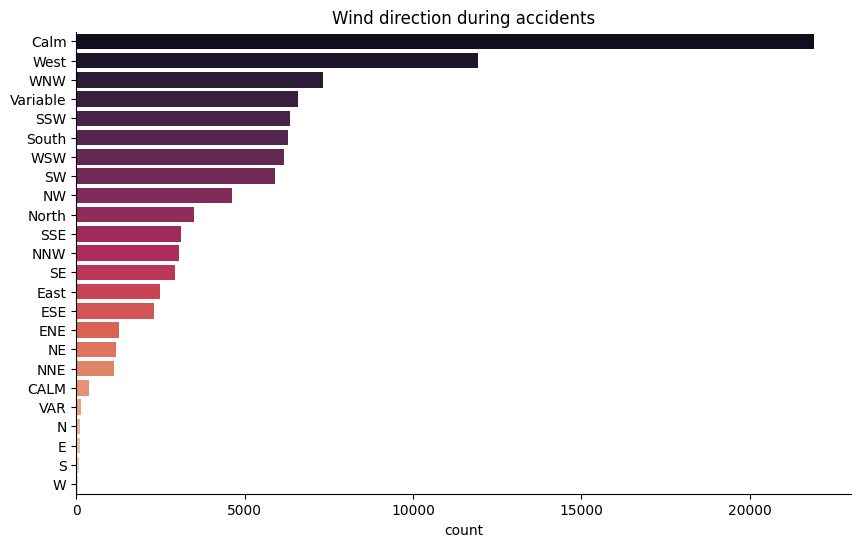

In [33]:
# Wind direction wise distribution of the accidents
plt.figure(figsize=(10,6))
wind_dir=data.Wind_Direction.value_counts().sort_values(ascending=False)
sns.barplot(y=wind_dir.index,x=wind_dir,palette="rocket")
sns.despine(right=True)
plt.ylabel(None)
plt.title("Wind direction during accidents")
plt.show()

Crossing
False    93511
True      6489
Name: Crossing, dtype: int64


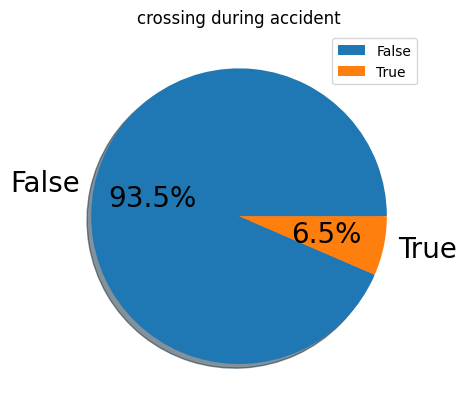

In [34]:
# crossing data distribution
crossing=data.groupby("Crossing")["Crossing"].count()
print(crossing)
plt.pie(crossing,labels=crossing.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("crossing during accident")
plt.legend()
plt.show()


Junction
False    89566
True     10434
Name: Junction, dtype: int64


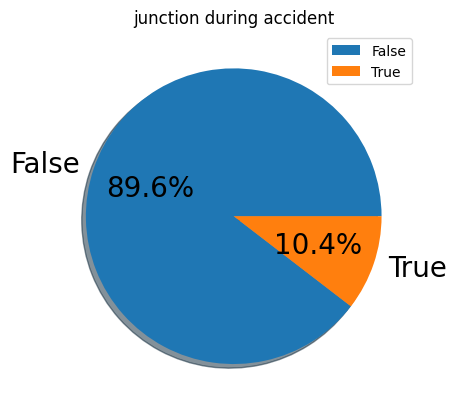

In [35]:
# juntion data distribution
junction=data.groupby("Junction")["Junction"].count()
print(junction)
plt.pie(junction,labels=junction.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("junction during accident")
plt.legend()

Junction
False    89566
True     10434
Name: Junction, dtype: int64


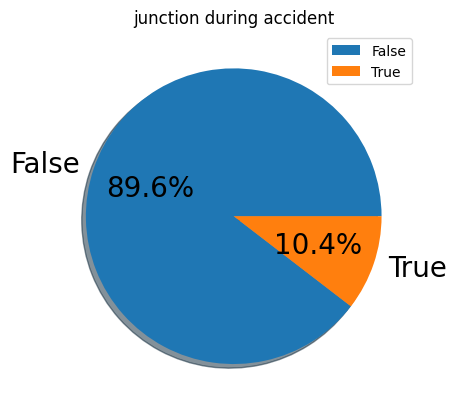

In [36]:
# juntion data distribution
junction=data.groupby("Junction")["Junction"].count()
print(junction)
plt.pie(junction,labels=junction.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("junction during accident")
plt.legend()
plt.show()

Station
False    96832
True      3168
Name: Station, dtype: int64


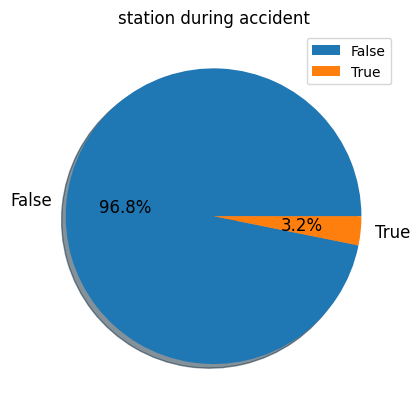

In [37]:
# station data distribution
station=data.groupby("Station")["Station"].count()
print(station)
plt.pie(station,labels=station.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":12})
plt.title("station during accident")
plt.legend()
plt.show()


Sunrise_Sunset
Day      62510
Night    37489
Name: count, dtype: int64


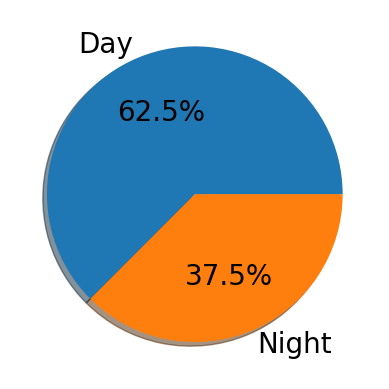

In [38]:
# Accidents day vs night
day_night=data.Sunrise_Sunset.value_counts()
print(day_night)
plt.pie(day_night,labels=day_night.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.show()


Severity
1       98
2    55025
3    44844
4       33
Name: Severity, dtype: int64


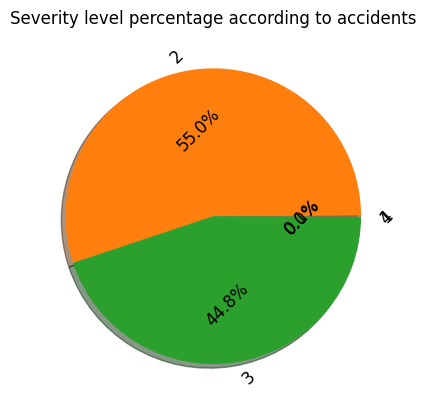

In [40]:
# Percentage of severity levels according to accidents
severity_per=data.groupby("Severity")["Severity"].count()
print(severity_per)
plt.pie(severity_per,labels=severity_per.index,autopct="%1.1f%%",shadow=True,textprops={"size":12,"rotation":45})
plt.title("Severity level percentage according to accidents")
plt.show()

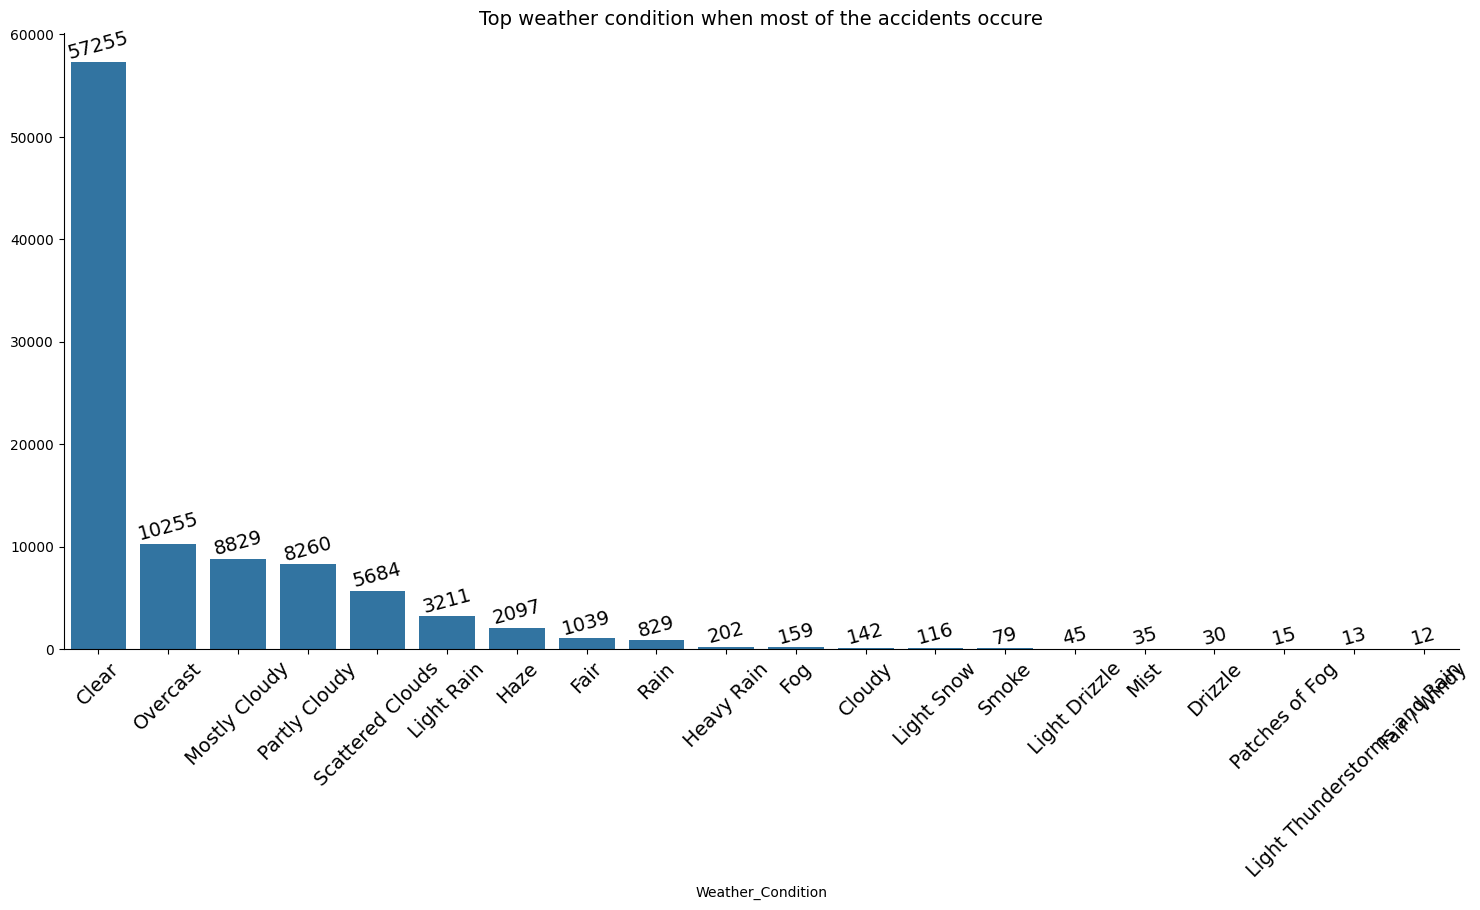

In [42]:
# Top weather condition when most of the accidents occure
plt.figure(figsize=(18,8))
weather_cond=data.groupby("Weather_Condition")["Weather_Condition"].count().sort_values(ascending=False).head(20)
sns.barplot(x=weather_cond.index,y=weather_cond)
sns.despine(right=True)
for i,v in enumerate(weather_cond):
   plt.text(i,v+1,str(v),ha="center",va="bottom",size=14,rotation=15)
plt.xticks(rotation=45,size=14)
plt.ylabel(None)
plt.title("Top weather condition when most of the accidents occure",fontsize=14)
plt.show()

Railway
False    98738
True      1262
Name: Railway, dtype: int64


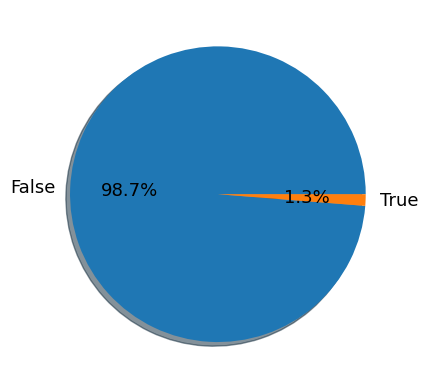

In [43]:
# Railway data distribution
railway=data.groupby("Railway")["Railway"].count()
print(railway)
plt.pie(railway,labels=railway.index,autopct="%1.1f%%",shadow=True,textprops={"size":13})
plt.show()


In [44]:
# average accidents on daily basis
date_wise=data.groupby("Date")["ID"].count()
date_wise.mean()

np.float64(294.11764705882354)

In [45]:
# average accidents per year
year_data=data.groupby("Year")["ID"].count()
avg_acc=year_data.mean()
print(year_data)
print("average accidents per year: ",f'\033[1m{avg_acc}')

Year
2016    90660
2017     9340
Name: ID, dtype: int64
average accidents per year:  50000.0


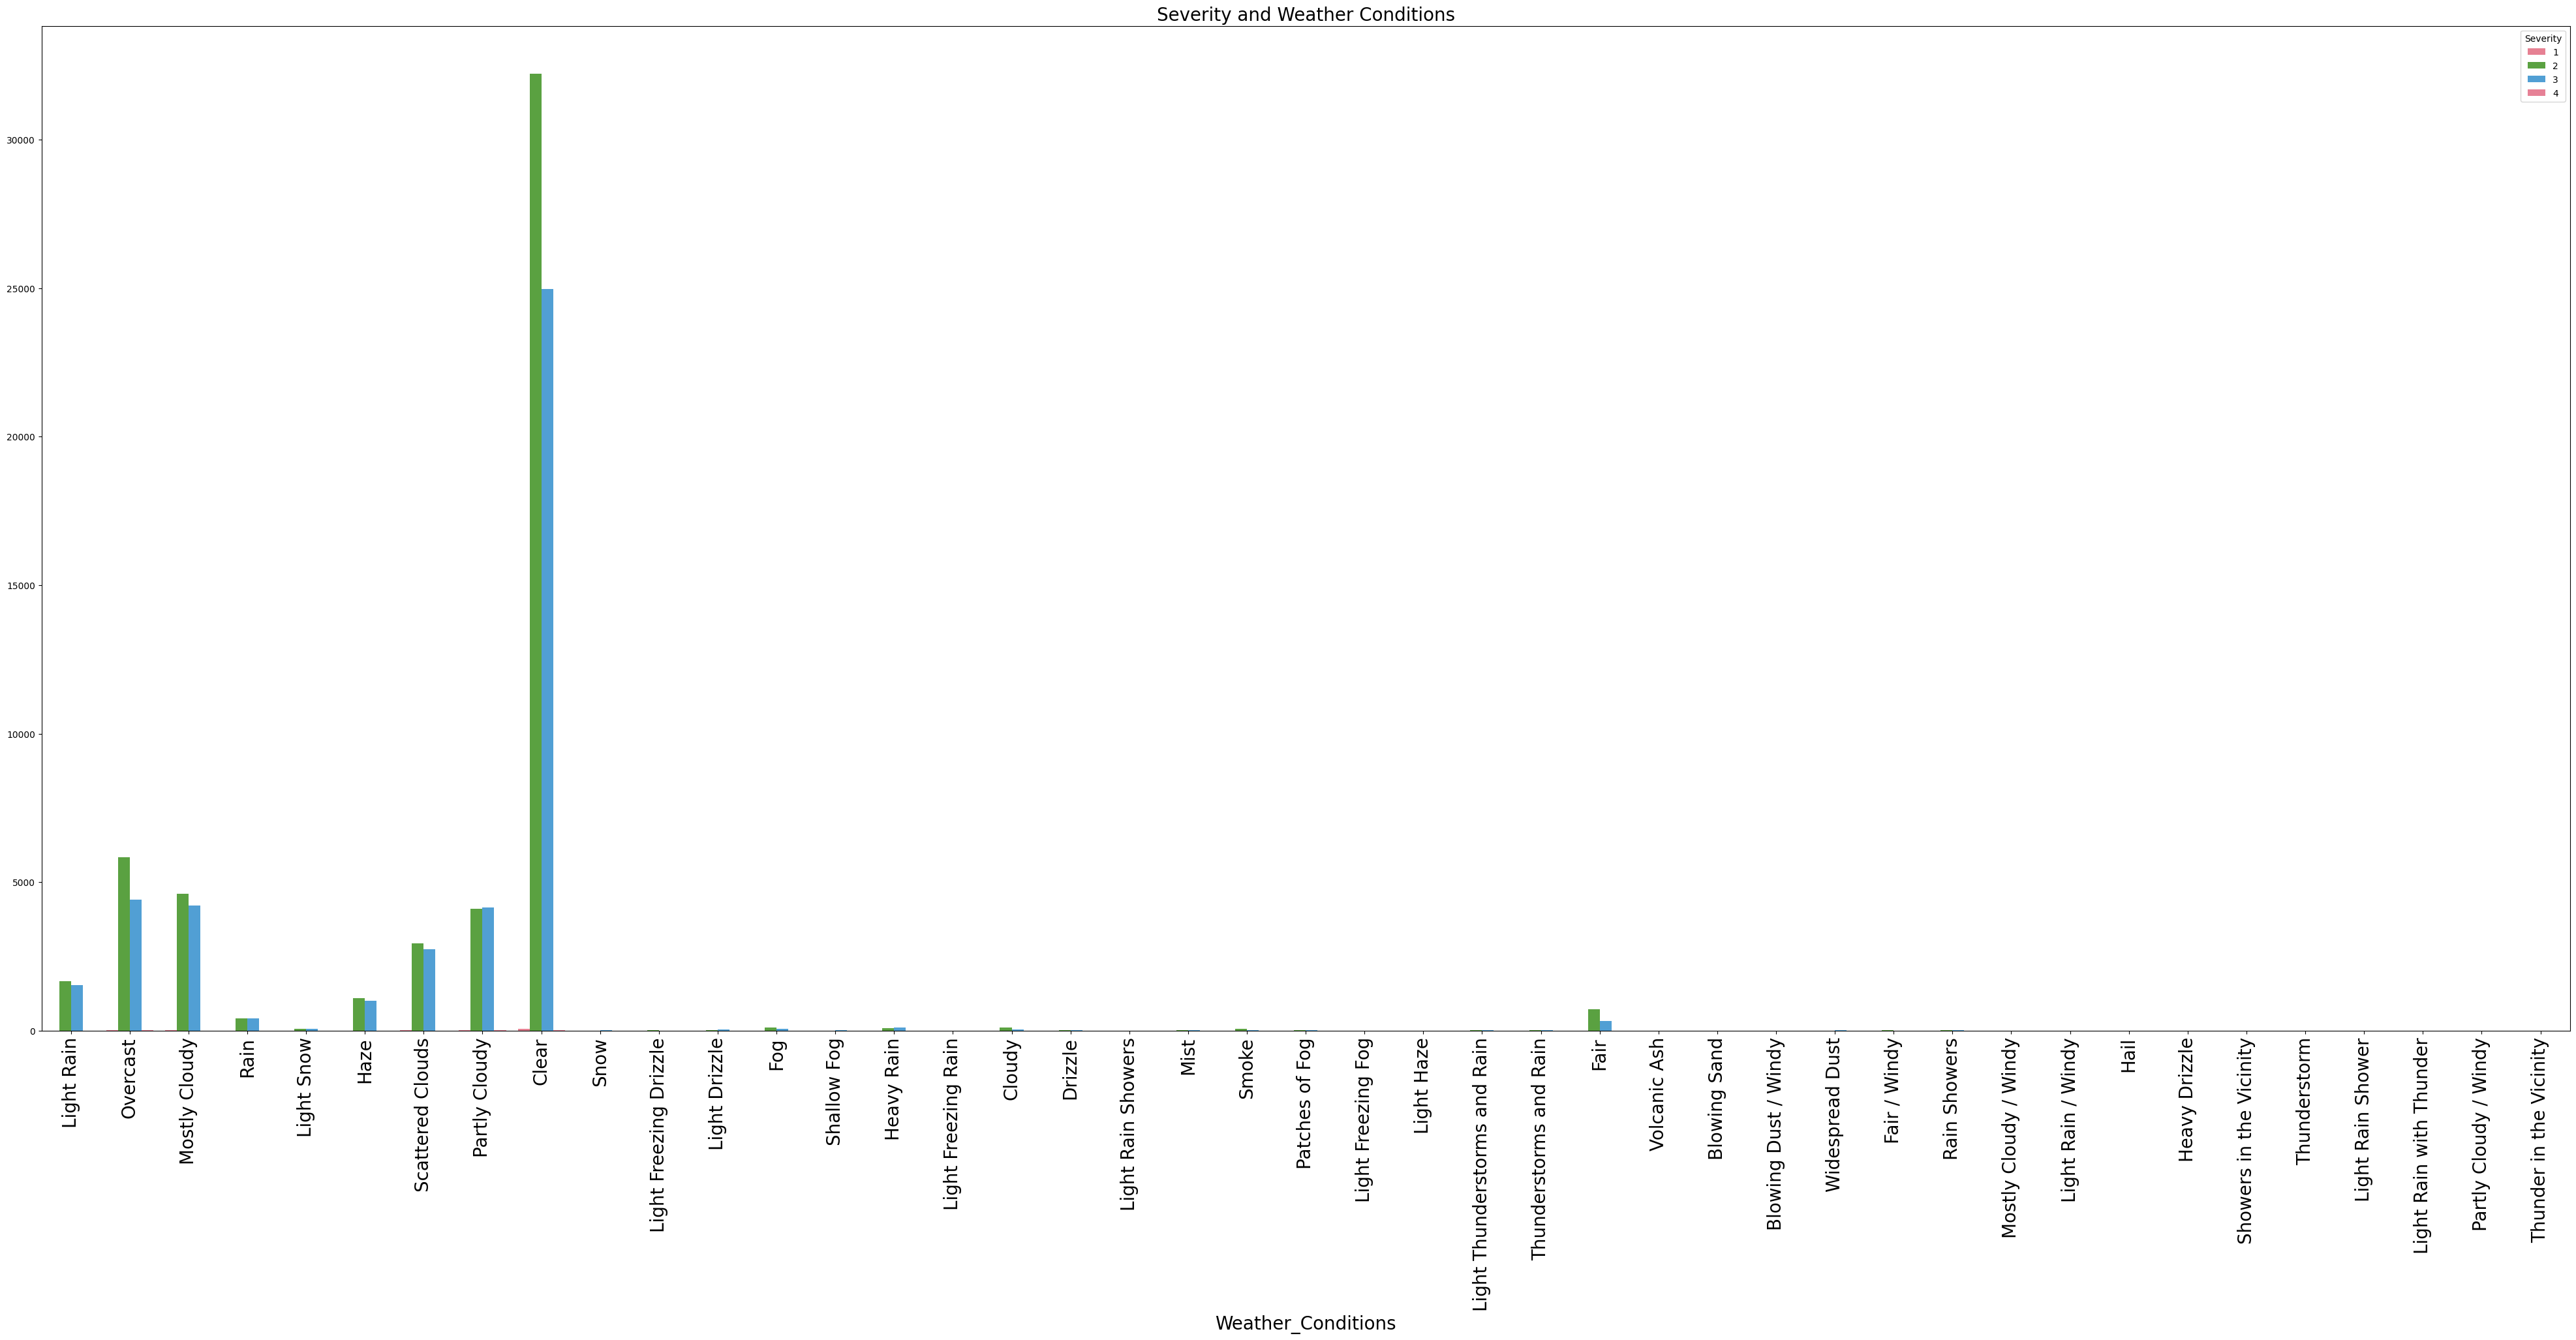

In [46]:
# Severity and Weather Conditions
# Double-Click to zome the chart
plt.figure(figsize=(50,20))
sns.countplot(data=data,x="Weather_Condition",hue="Severity",palette="husl")
plt.xticks(rotation=90,size=20)
plt.xlabel("Weather_Conditions",size=20)
plt.ylabel(None)
plt.title("Severity and Weather Conditions",size=20)
plt.show()


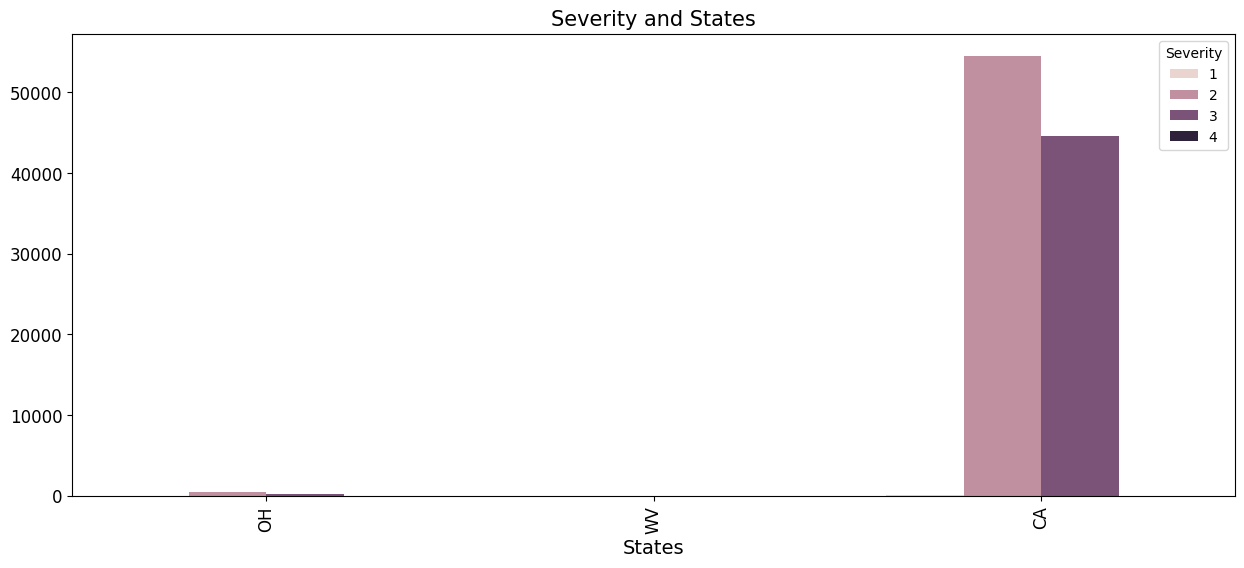

In [47]:
# Severity and States
plt.figure(figsize=(15,6))
sns.countplot(data=data,x="State",hue="Severity")
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.ylabel(None)
plt.xlabel("States",size=14)
plt.title("Severity and States",size=15)
plt.show()

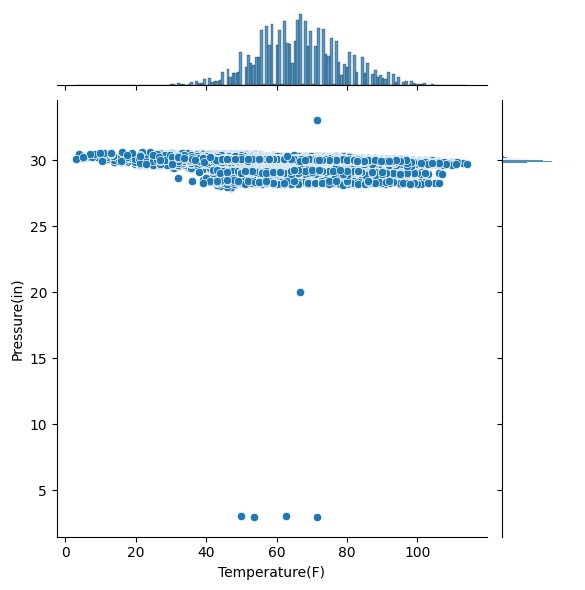

In [48]:
# Temperature and Pressure...
columns=data[["Temperature(F)","Pressure(in)"]]
plot_data=columns[columns.notnull().all(axis=1)]
sns.jointplot(data=plot_data,x="Temperature(F)",y="Pressure(in)")
plt.show()


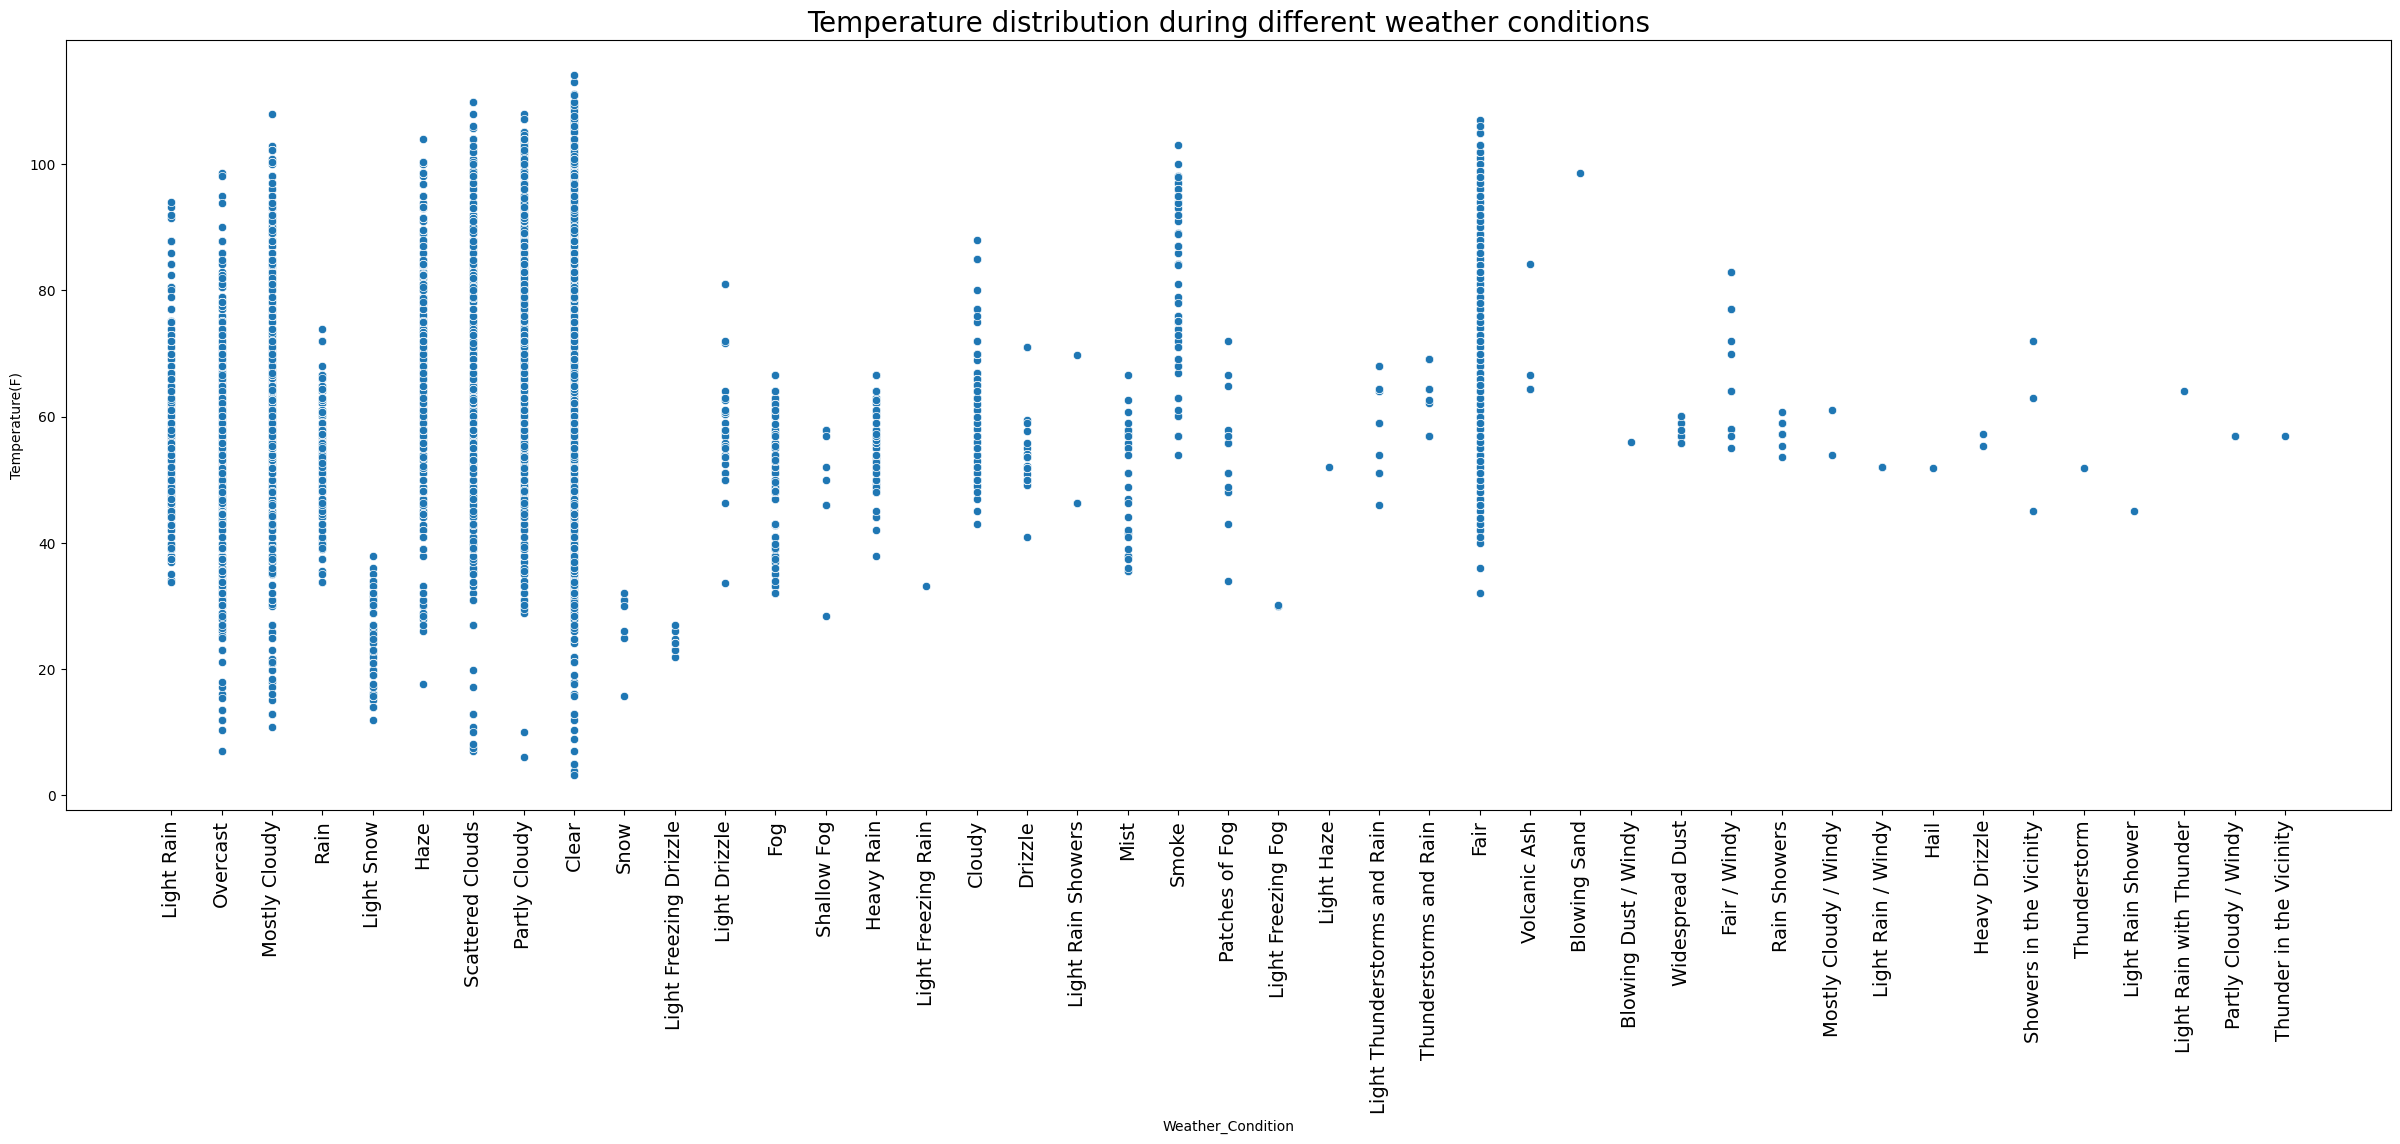

In [49]:
# Temperature distribution during different weather conditions
sns.scatterplot(data,x="Weather_Condition",y="Temperature(F)")
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("Temperature distribution during different weather conditions",size=20)
plt.show()

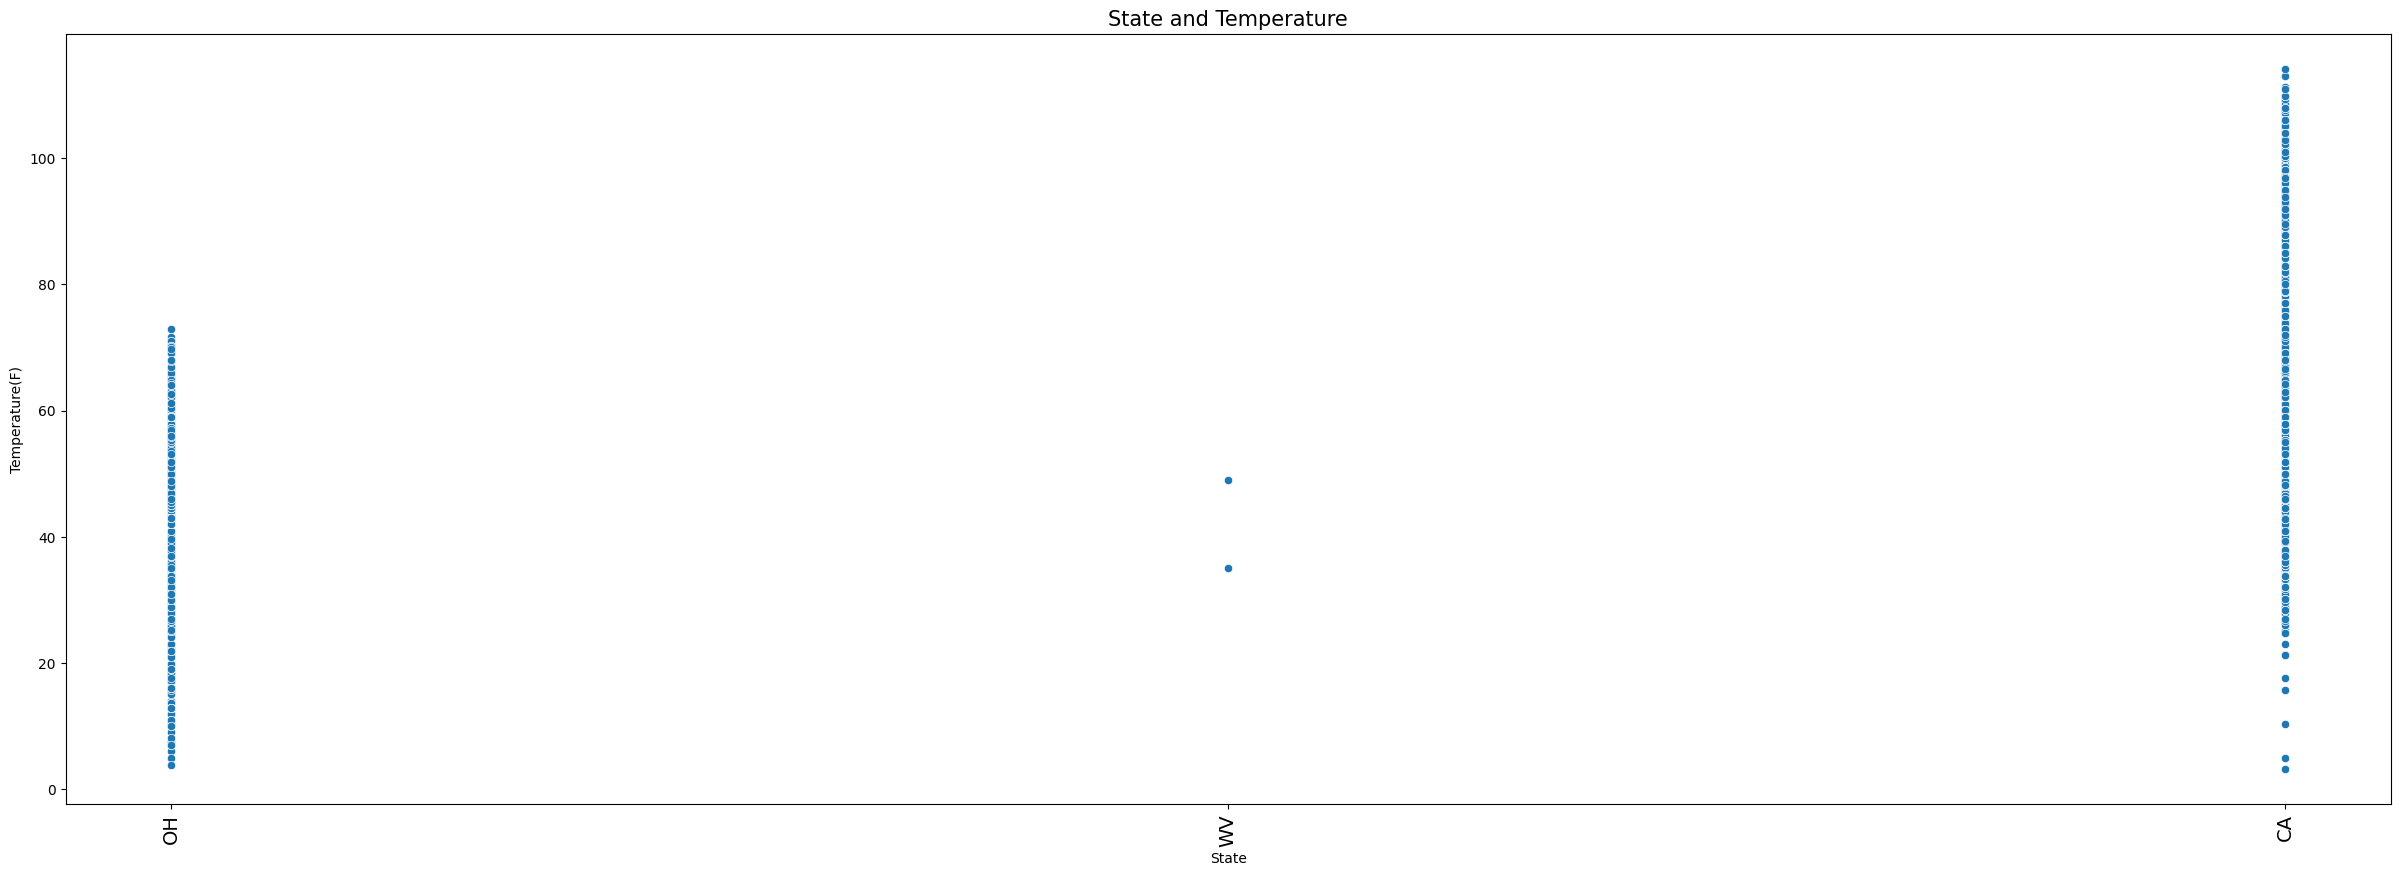

In [50]:
# State and Temperature
sns.scatterplot(data,x="State",y="Temperature(F)")
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("State and Temperature",size=15)
plt.show()


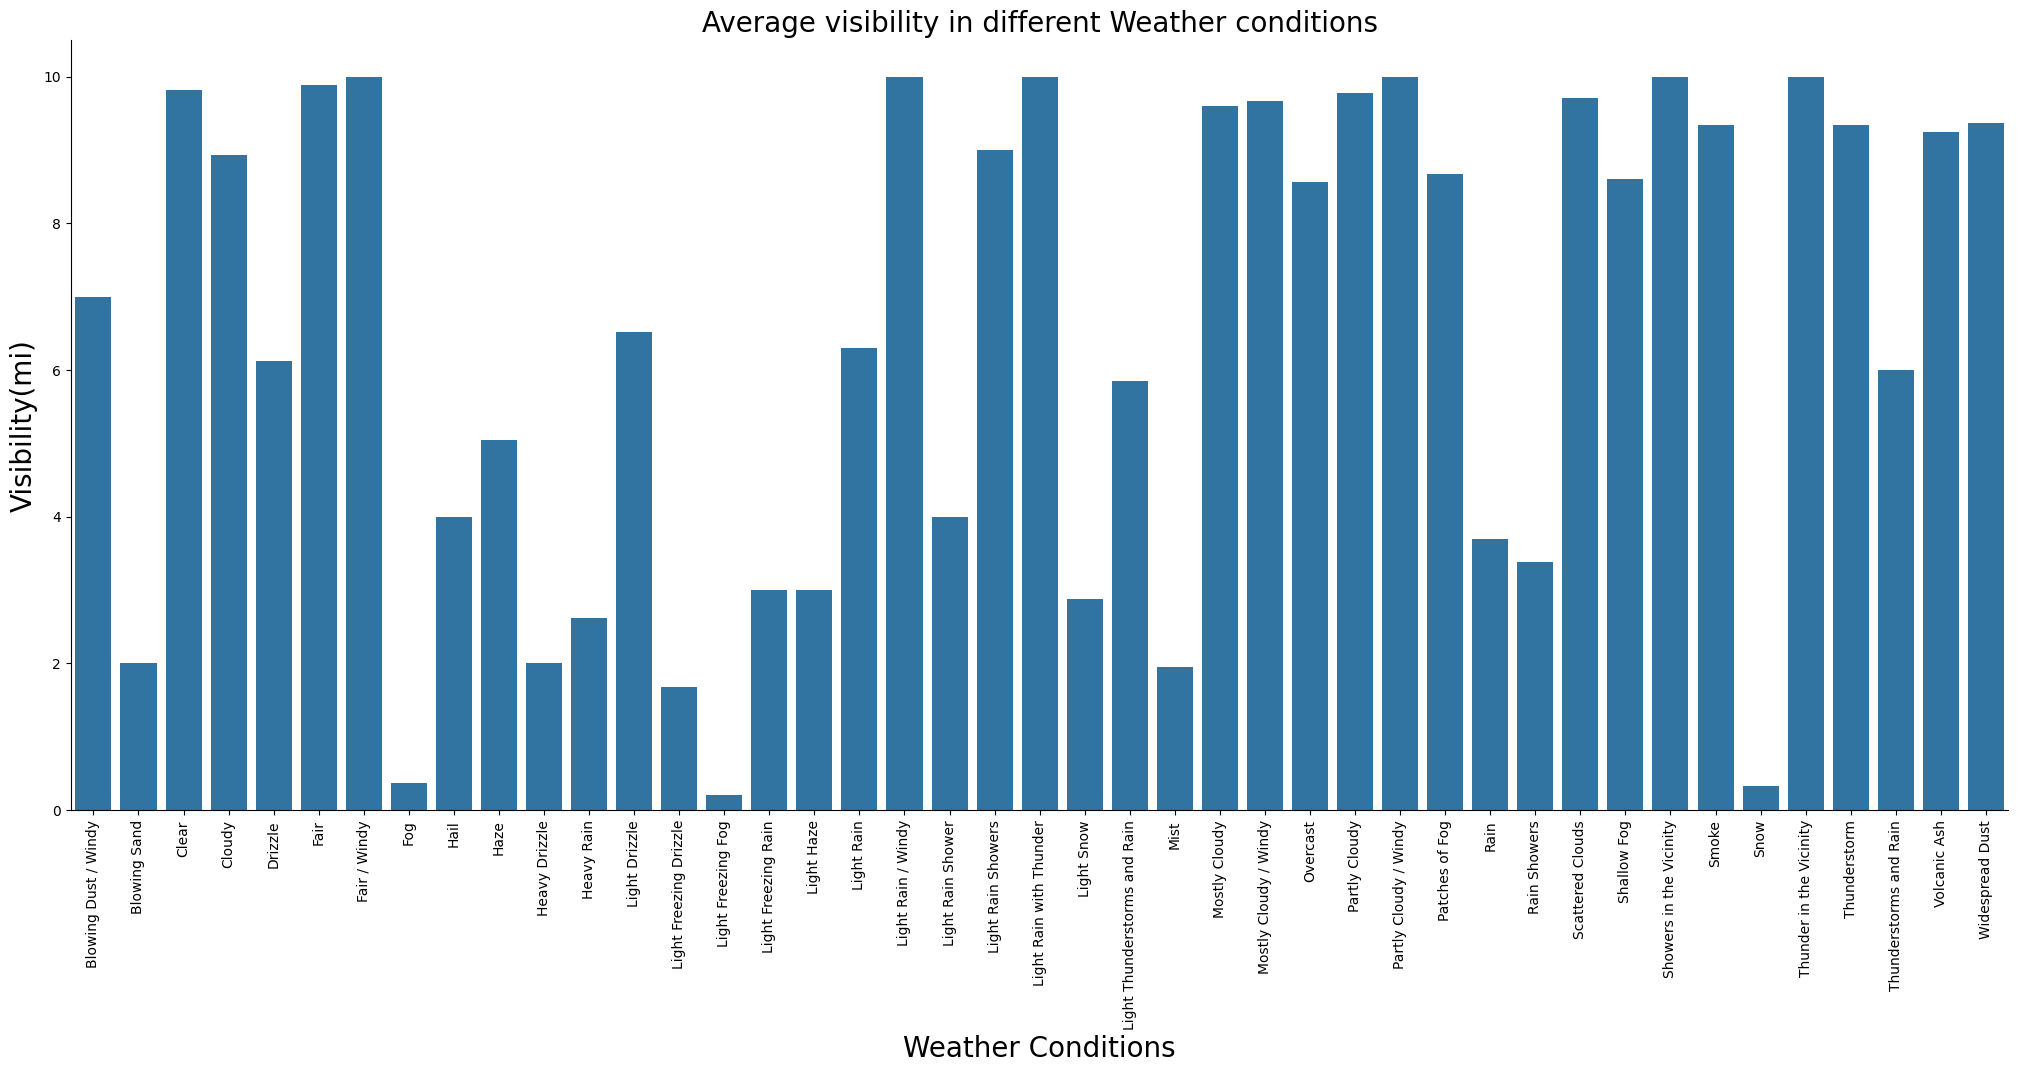

In [51]:
# Average visibility in different Weather conditions
# Double-Click to zoom the chart
plt.figure(figsize=(25,10))
avg_visibility=data.groupby('Weather_Condition')['Visibility(mi)'].mean()
sns.barplot(x=avg_visibility.index,y=avg_visibility)
sns.despine(right=True)
plt.title("Average visibility in different Weather conditions",size=20)
plt.ylabel("Visibility(mi)",size=20)
plt.xlabel("Weather Conditions",size=20)
plt.xticks(rotation=90)
plt.show()


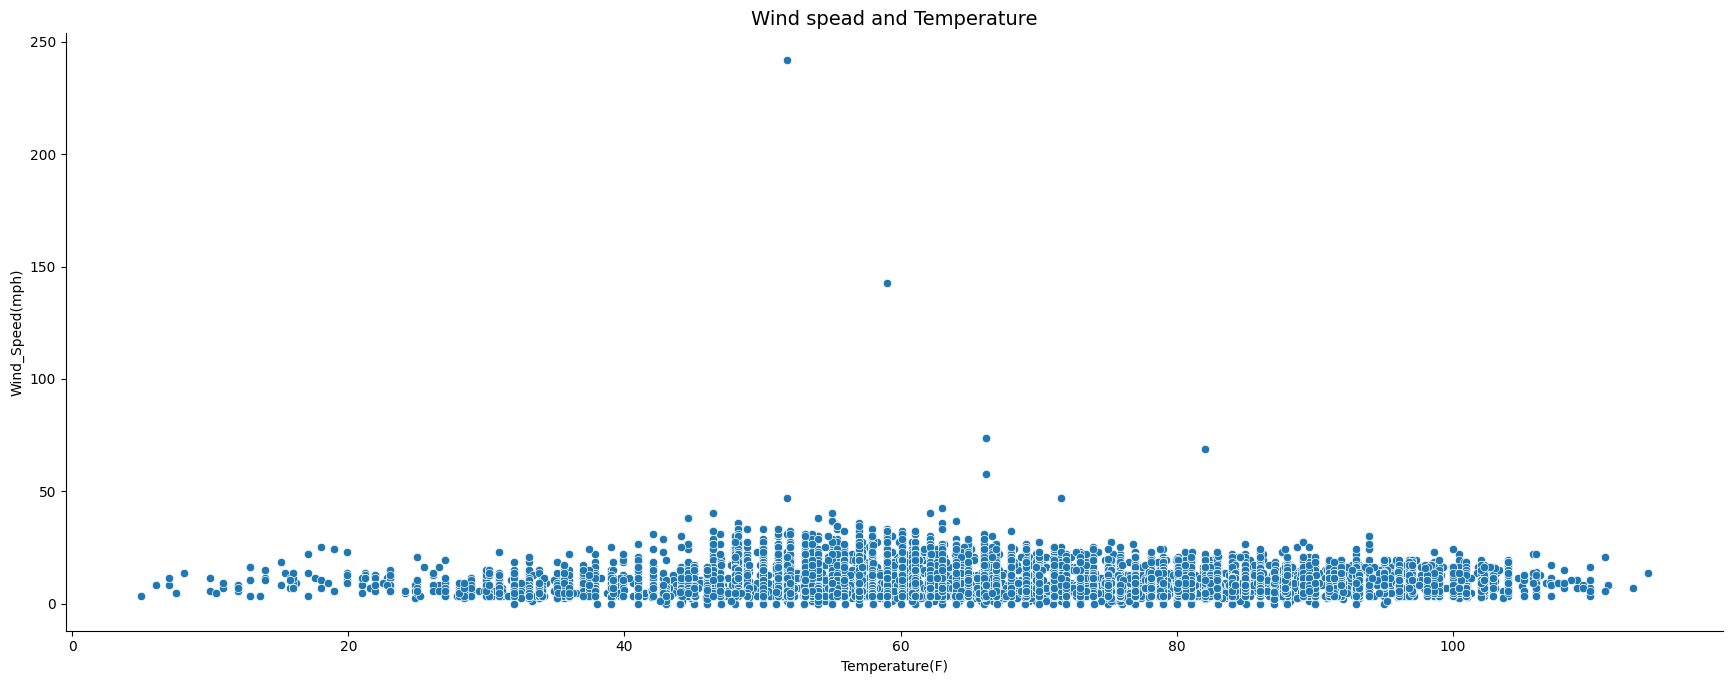

In [52]:
# Wind spead and Temperature
sns.relplot(data,x="Temperature(F)",y="Wind_Speed(mph)")
plt.title("Wind spead and Temperature",size=14)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()


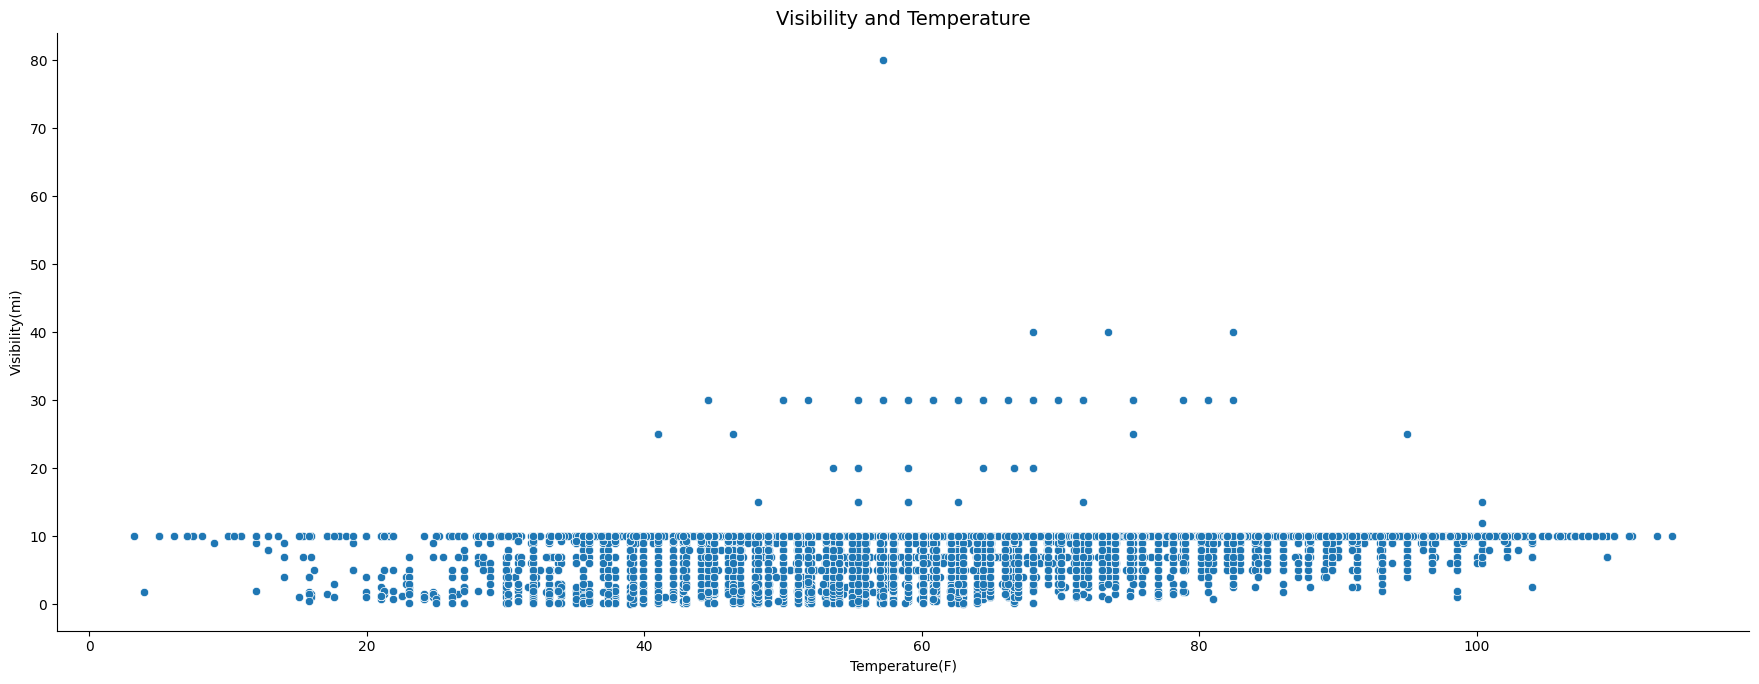

In [53]:
# Visibility and Temperature
sns.relplot(data,x="Temperature(F)",y="Visibility(mi)")
plt.title("Visibility and Temperature",size=14)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

In [55]:
#multivariant analysis
# State vs Weather condition and average Temperature...
cols=data[["State","Weather_Condition","Temperature(F)"]]
not_null_data=cols[cols.notnull().all(axis=1)]
# not_null_data
pivot_table=not_null_data.pivot_table(index="State",columns="Weather_Condition",values="Temperature(F)",aggfunc='mean')
display(pivot_table)

Weather_Condition,Blowing Dust / Windy,Blowing Sand,Clear,Cloudy,Drizzle,Fair,Fair / Windy,Fog,Hail,Haze,...,Scattered Clouds,Shallow Fog,Showers in the Vicinity,Smoke,Snow,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Volcanic Ash,Widespread Dust
State,,,,,,,,,,,,,,,,,,,,,
CA,56.0,98.6,69.926190,59.347518,54.237931,74.157844,68.166667,50.156577,51.8,67.610981,...,64.888506,52.4,60.0,81.232911,28.80,57.0,51.8,63.92,69.910316,57.809091
OH,NaN,NaN,42.897581,NaN,41.000000,NaN,NaN,41.550000,NaN,33.521053,...,42.576364,28.4,NaN,NaN,23.35,NaN,NaN,NaN,NaN,NaN
WV,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


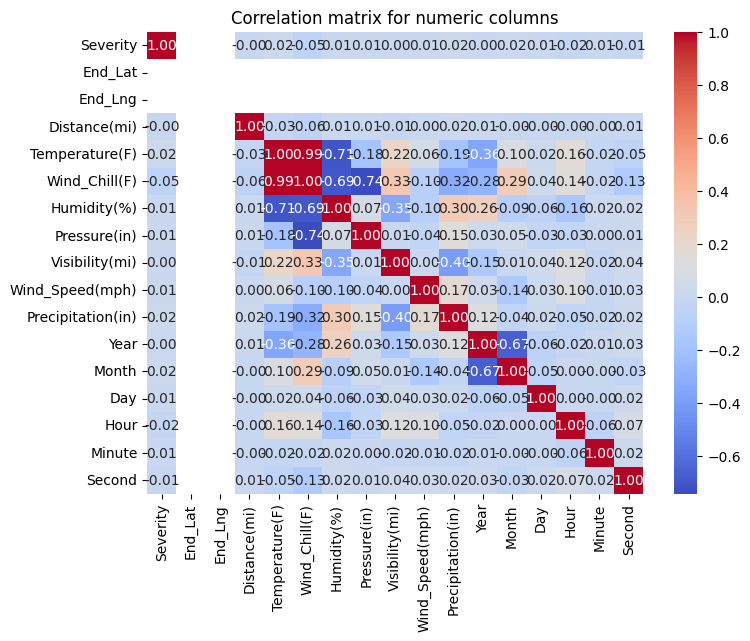

In [56]:
num_cols=data.select_dtypes(include="number").columns.tolist()
num_data=data[['Severity',
'End_Lat',
'End_Lng',
'Distance(mi)',
'Temperature(F)',
'Wind_Chill(F)',
'Humidity(%)',
'Pressure(in)',
'Visibility(mi)',
'Wind_Speed(mph)',
'Precipitation(in)',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second']]
plt.figure(figsize=(8, 6)) # Adjust the figure size if needed
correlation_matrix=num_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for numeric columns")
plt.show()